# Day4 Clustering

Datayı benzerliklerine göre gruplandırma yapacağız.

In [3]:
import pandas as pd

In [4]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_excel('cars.xls')

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Hatırlatma 
Regression da r2 RMSE ye bakılır </br>
Classification da Accuracy, F1 Score Classification Report ve Confusion Matrix bakılır </br>
Clustering de Silhouette Score bakılır

In [8]:
x=df[['Price','Mileage','Cylinder']]

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [11]:
model=KMeans(4)

In [12]:
model=model.fit(x)

In [13]:
tahmin=model.predict(x)

In [14]:
tahmin

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [15]:
x['cluster']=tahmin

In [16]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [17]:
silhouette_score(x,tahmin)

0.4140628518179858

In [18]:
import matplotlib.pyplot as plt

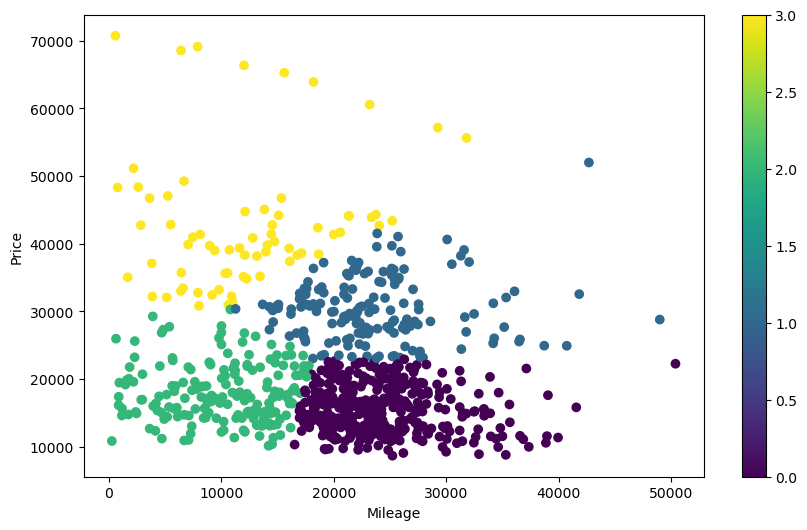

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin)
plt.colorbar()
plt.xlabel('Mileage')
plt.ylabel('Price');

In [20]:
wcss=[] #within cluster sum of squares
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.451040890938924
0.4033924798971527
0.41064294037238197
0.3635167698300368
0.3576077270963677
0.36171711040076954
0.3521977270378552
0.34532535225792493


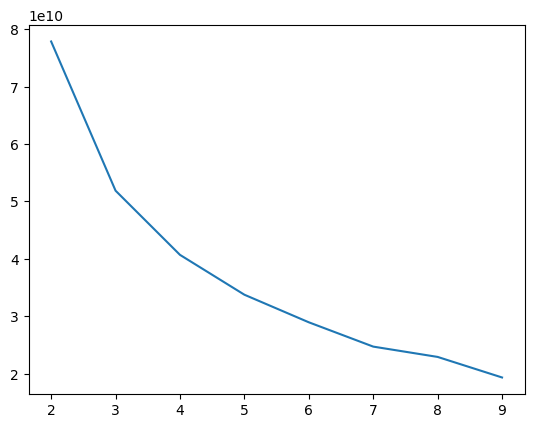

In [41]:
plt.plot(range(2,10),wcss);

In [43]:
import seaborn as sns

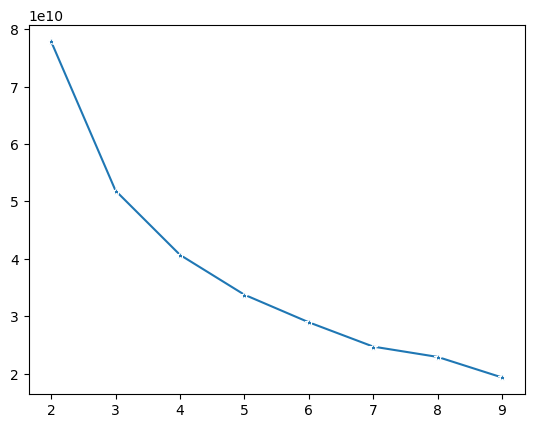

In [51]:
sns.lineplot(x=range(2,10),y=wcss,marker='*');

In [55]:
#pip install yellowbrick

In [57]:
from yellowbrick.cluster import KElbowVisualizer

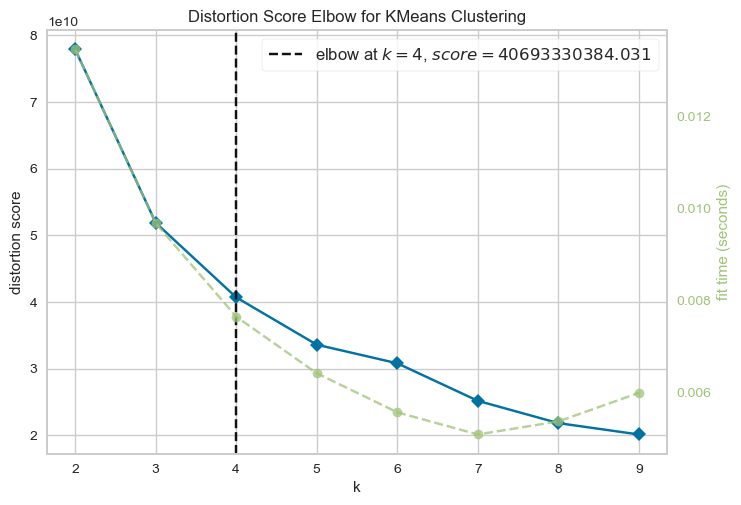

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [69]:
#Hierachical Clustering

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
data=linkage(x, method='ward', metric='euclidean')

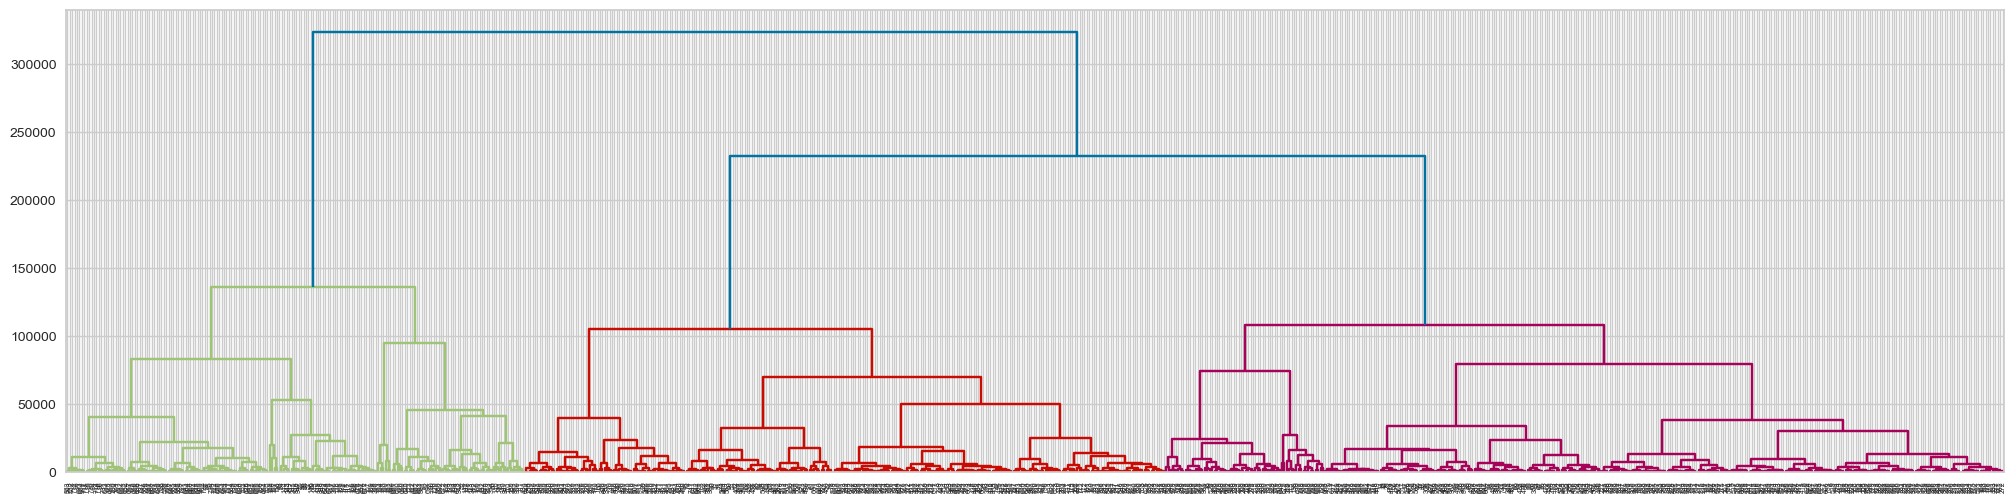

In [77]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [79]:
df=pd.read_csv('Billionaires.csv')

In [81]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


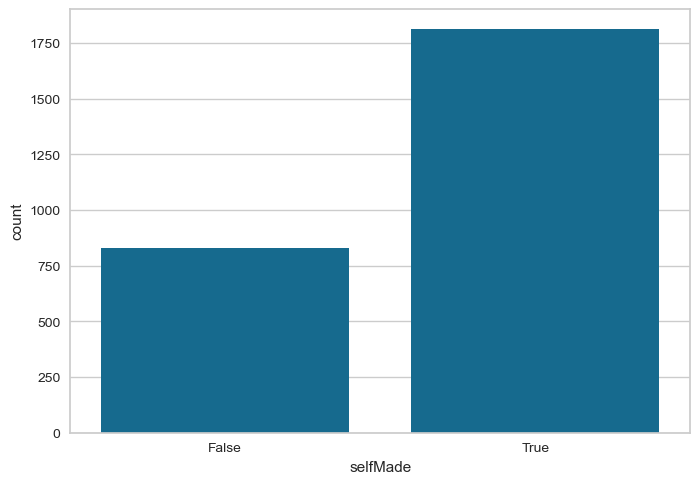

In [85]:
sns.countplot(x=df['selfMade']);

<Axes: xlabel='count', ylabel='country'>

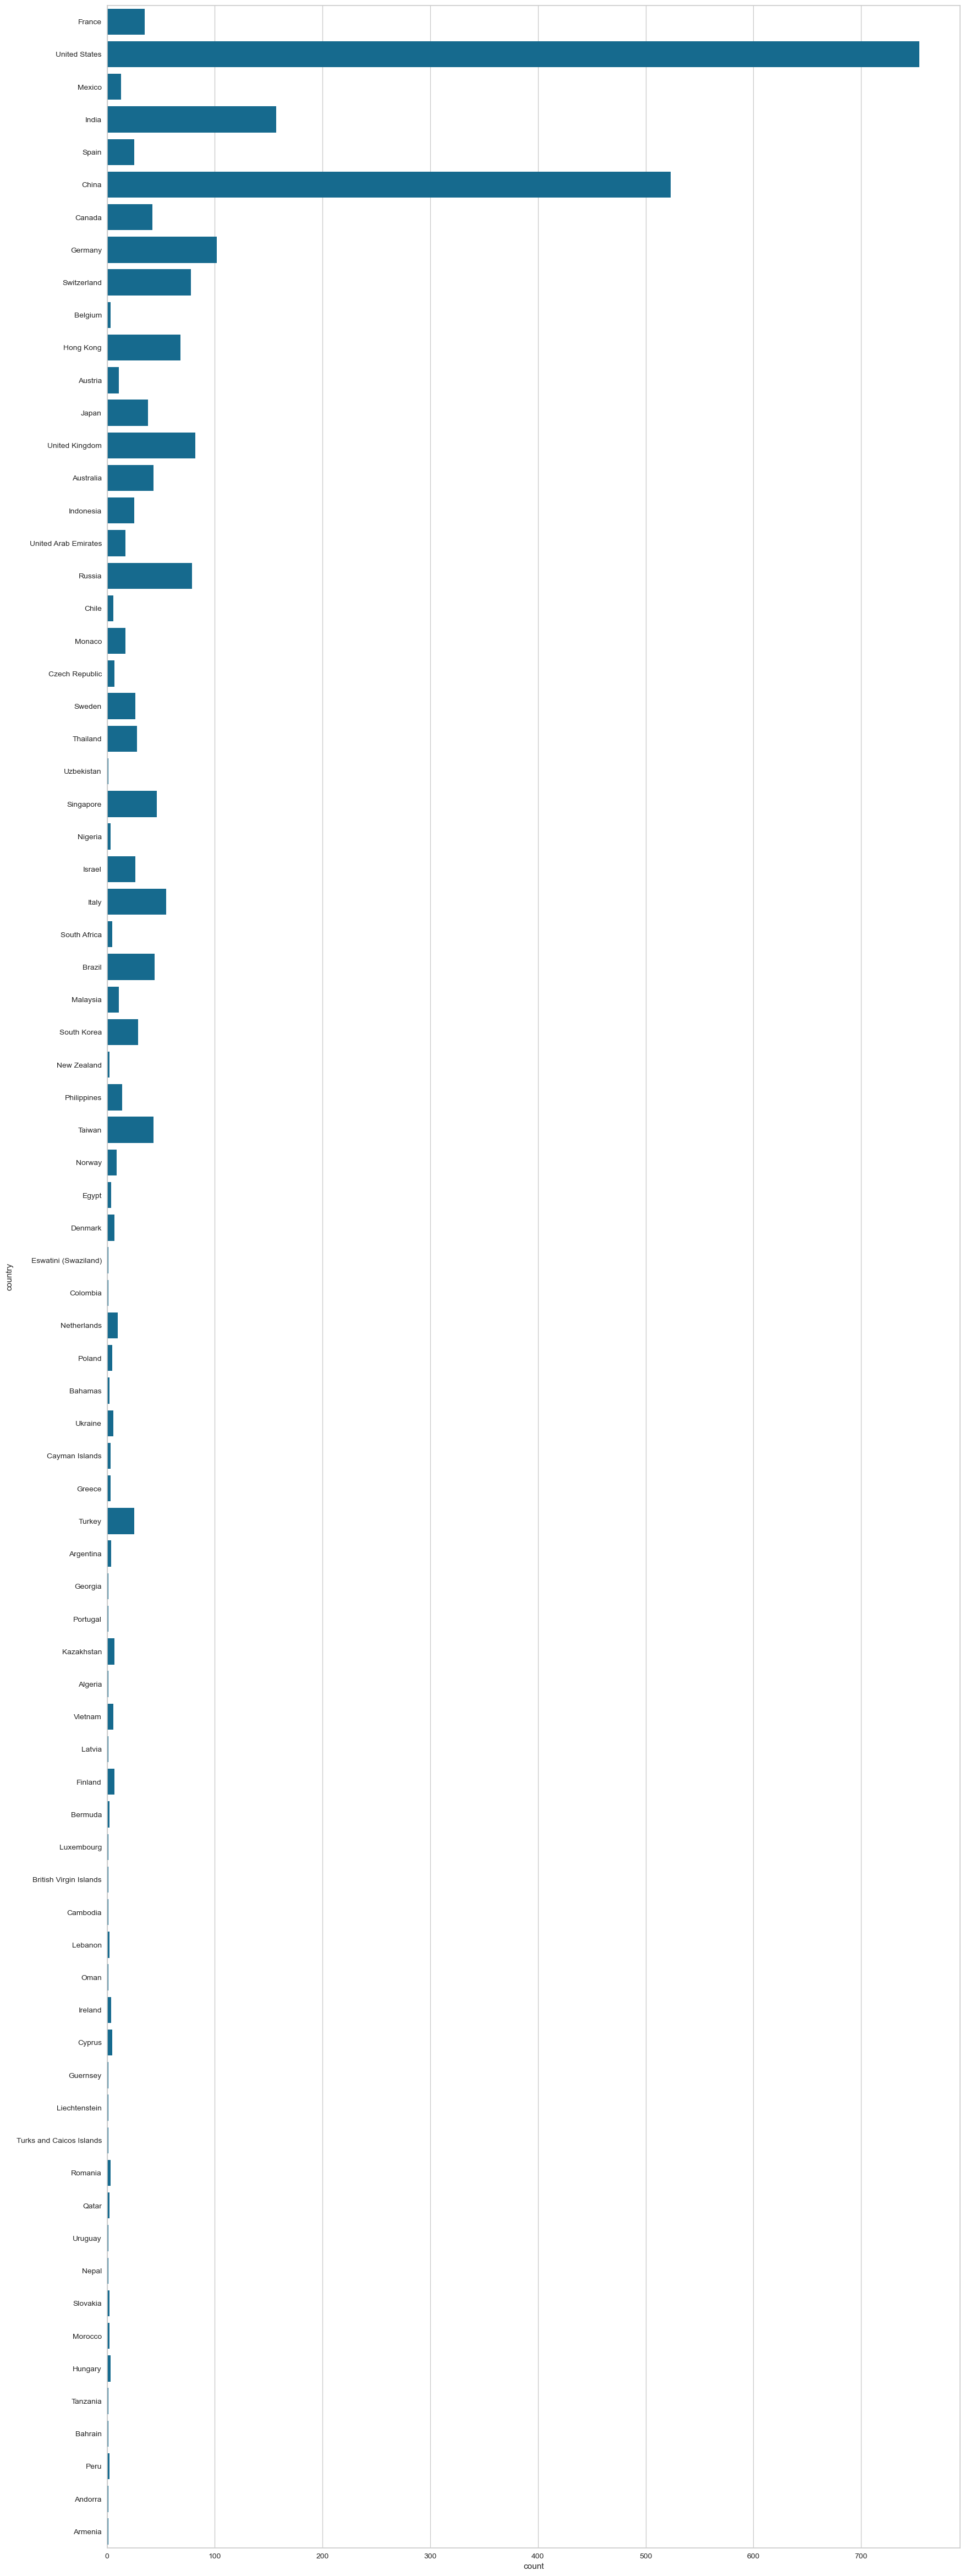

In [89]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'])

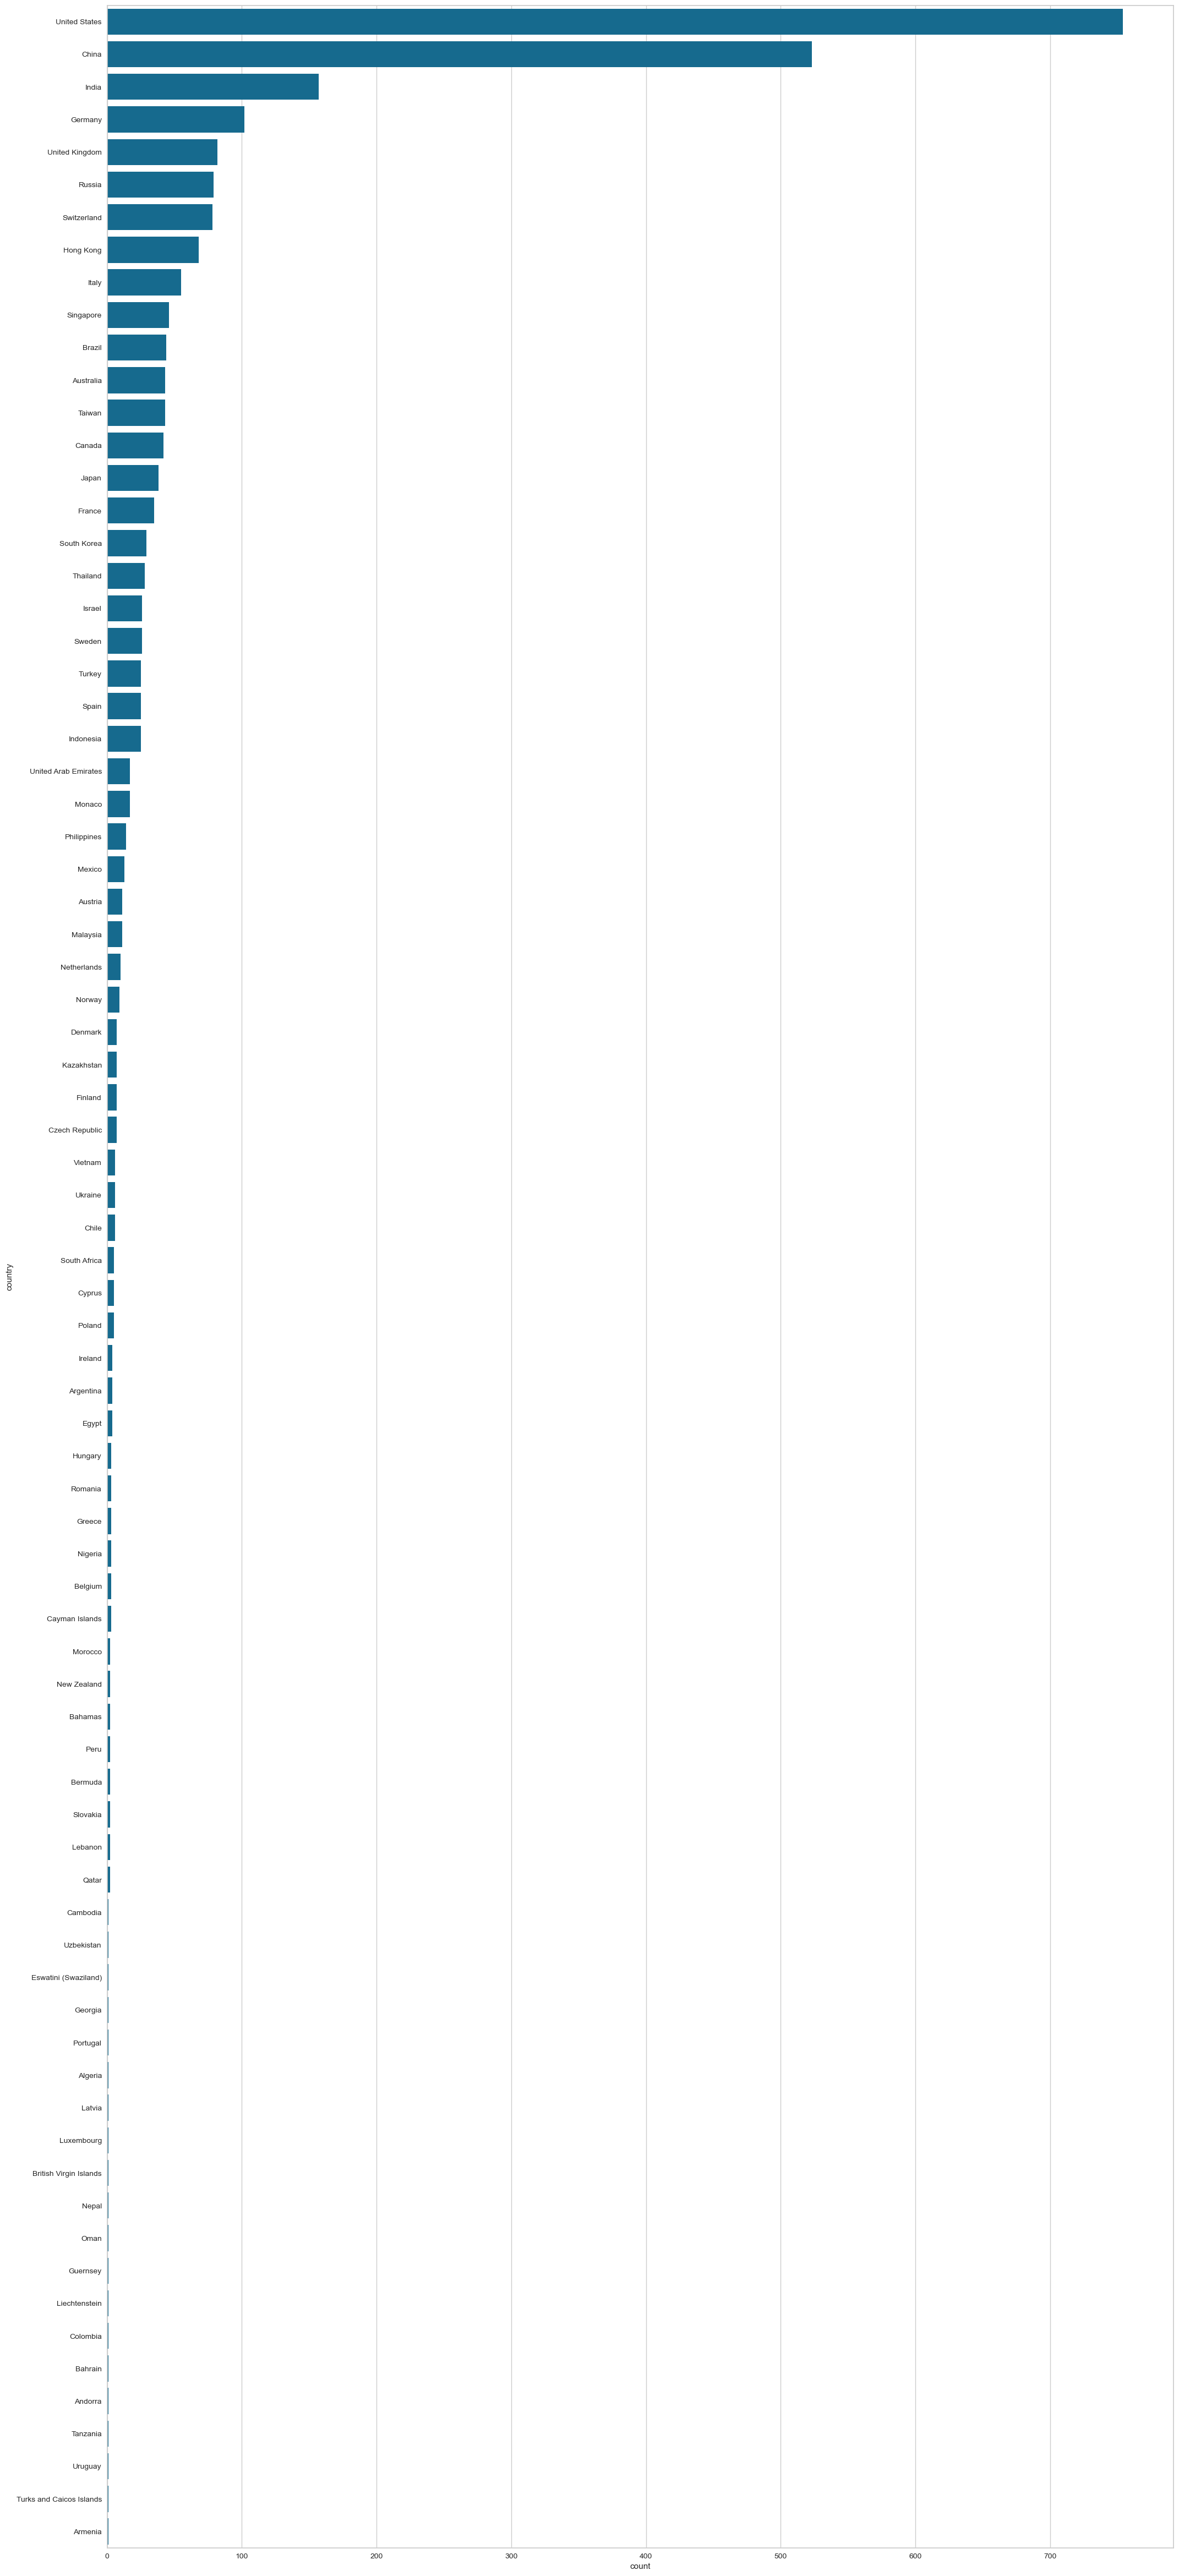

In [103]:
ydf=df['country'].value_counts().sort_values(ascending =False)
plt.figure(figsize=(25,60))
sns.countplot(y=df['country'],order=ydf.index);

In [105]:
df[df['country']=='Turkey']

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
498,497,5300,Manufacturing,Ibrahim Erdemoglu,60.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
548,534,5000,Food & Beverage,Murat Ulker,64.0,Turkey,Istanbul,Food,Food & Beverage,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
582,580,4700,Manufacturing,Ali Erdemoglu,63.0,Turkey,Istanbul,Carpet,Manufacturing,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
982,982,3000,Diversified,Semahat Sevim Arsel,94.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1042,1027,2900,Diversified,Ipek Kirac,38.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1128,1104,2700,Diversified,Mustafa Rahmi Koc,92.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1242,1217,2500,Energy,Saban Cemil Kazanci,62.0,Turkey,Istanbul,Energy,Energy,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1256,1217,2500,Diversified,Ferit Faik Sahenk,59.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1326,1312,2300,Construction & Engineering,Erman Ilicak,55.0,Turkey,Ankara,Construction,Construction & Engineering,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322
1349,1312,2300,Diversified,Filiz Sahenk,56.0,Turkey,Istanbul,Diversified,Diversified,Turkey,...,15.2,"$754,411,708,203",23.9,93.2,77.4,17.9,42.3,83429615.0,38.963745,35.243322


In [107]:
tr=df[df['country']=='Turkey']

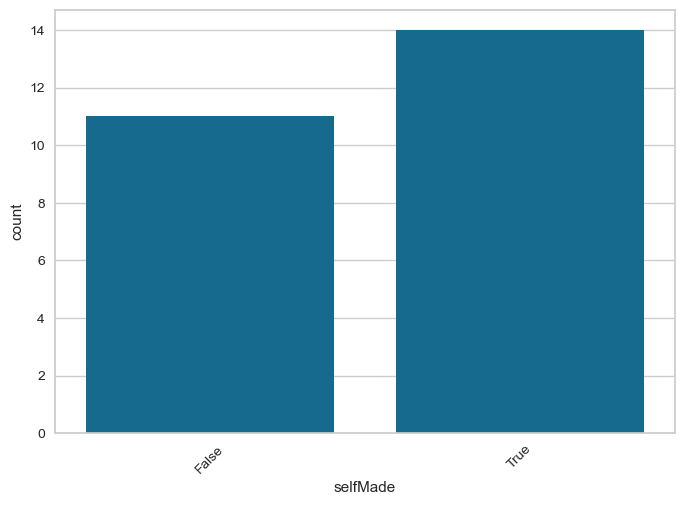

In [115]:
sns.countplot(x=tr['selfMade'])
plt.xticks(rotation=45);

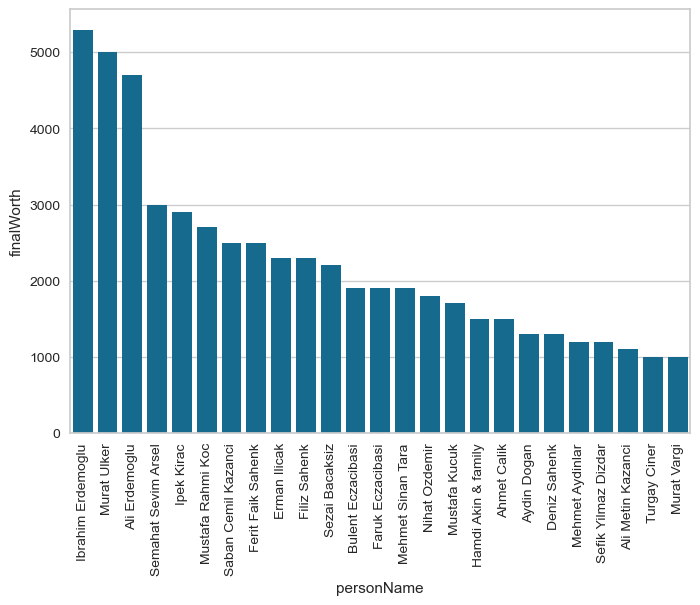

In [127]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

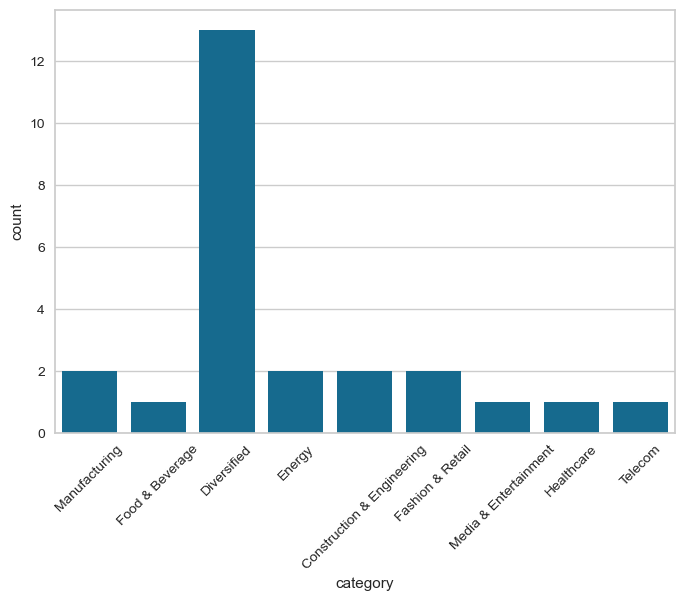

In [133]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=45);

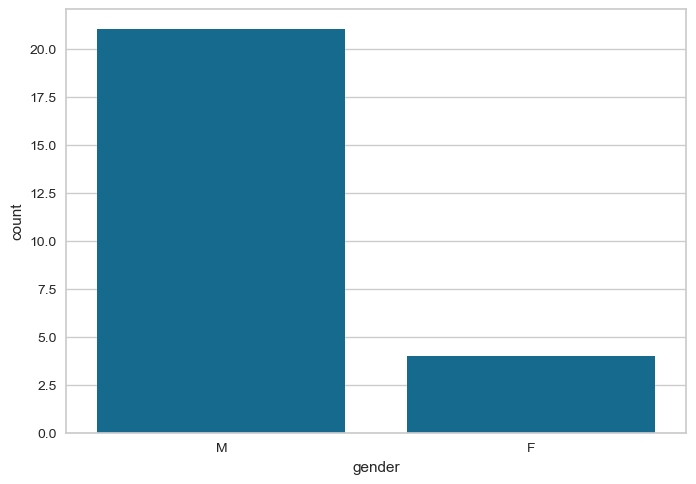

In [141]:
sns.countplot(x=tr['gender']);